pregnant : 임신한 횟수
plasma : 혈장 포도당 농도
pressure : 이완기 혈압
thickness : 삼두근 피부주름 두께
insulin : 혈청 인슐린 농도
bmi : 체질량 지수
pedigree : 당뇨병 가족력에 대한 측정값
age : 환자의 나이
class : 당뇨병 발병여부(0:당뇨병없음, 1:당뇨병발병)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#데이터 가져오기
data = pd.read_csv('pima-indians-diabetes.csv', names = ['pregnant', 'plasma', 'pressure', 'thickness',
                                                         'insulin', 'bmi', 'pedigree', 'age', 'class'])
data

#데이터 확인
print(data.head())
data.info()
data.describe()

   pregnant  plasma  pressure  thickness  insulin   bmi  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


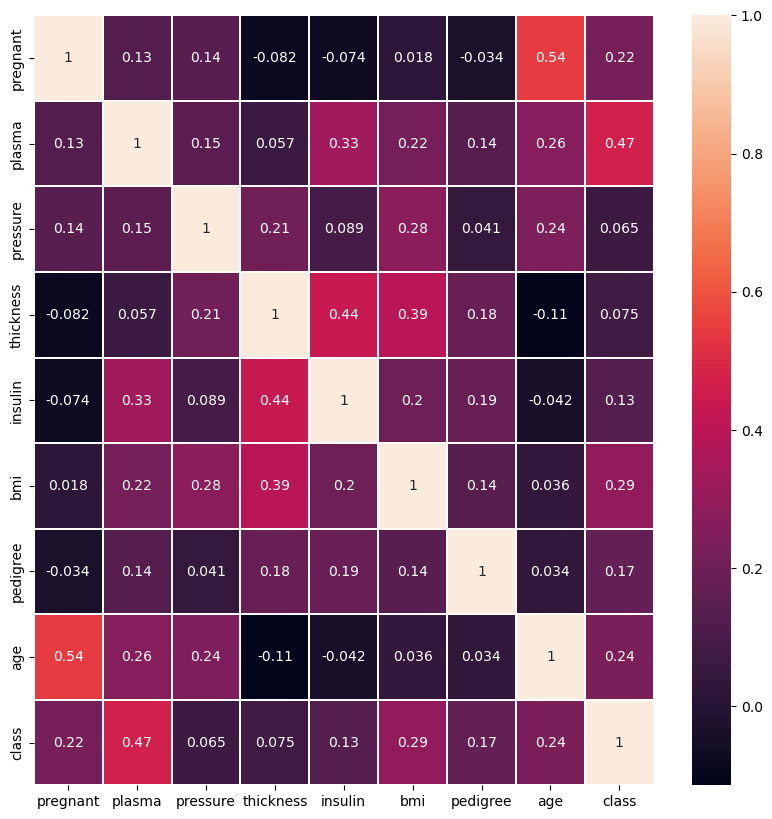

In [3]:
#속성별 당뇨병 발병 상관관계 계산
print(data[['pregnant', 'class']].groupby('pregnant', as_index =
                                          False).mean().sort_values(by='pregnant', ascending=True))

#데이터 시각화
plt.figure(figsize = (10, 10))
sns.heatmap(data.corr(), linewidths = 0.2, annot = True)
plt.show()

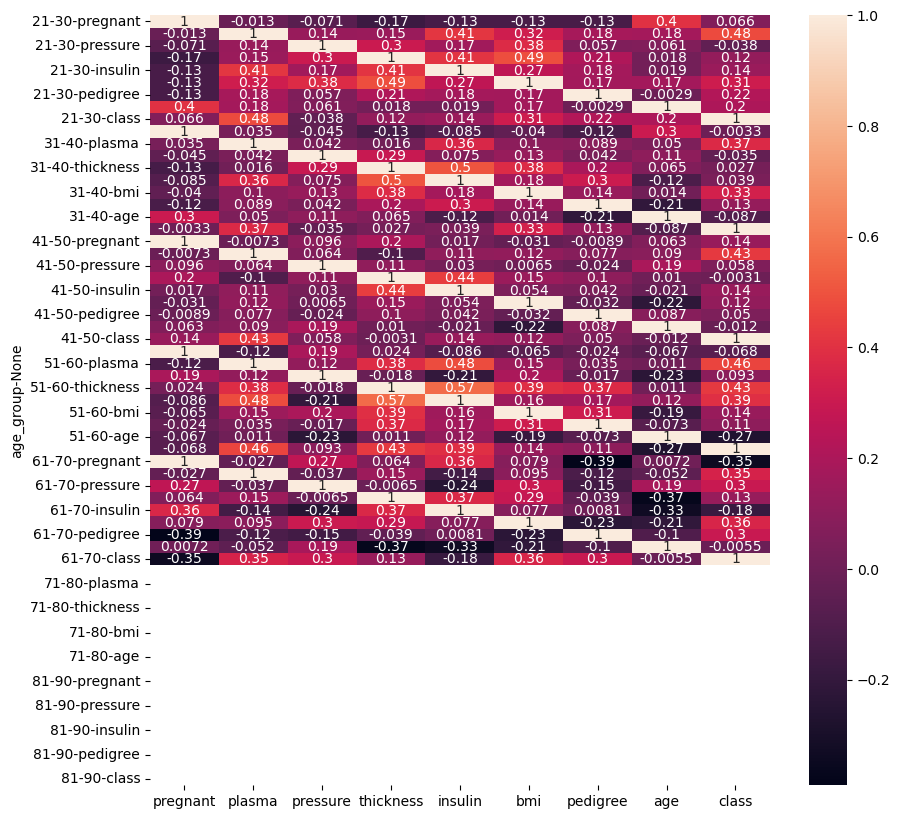

In [4]:
#나이와 당뇨병 발생여부 기준 상관관계 확인
#나이열로 그룹화
data['age_group'] = pd.cut(data['age'], bins = [20, 30, 40, 50, 60, 70, 80, 90],
                           labels = ['21-30', '31-40', '41-50','51-60', '61-70', '71-80', '81-90'])

data

age_group_corr = data.groupby('age_group').corr()
# print(age_group_corr)

plt.figure(figsize = (10, 10))
sns.heatmap(age_group_corr, annot=True)
plt.show()

0    500
1    268
Name: class, dtype: int64


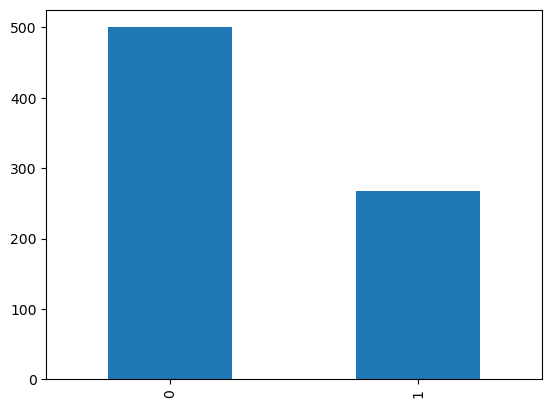

In [5]:
#class 열의 값에 따라 그룹화하고 개수 시각화
class_counts = data['class'].value_counts()
print(class_counts)

class_counts.plot(kind='bar')
plt.show()

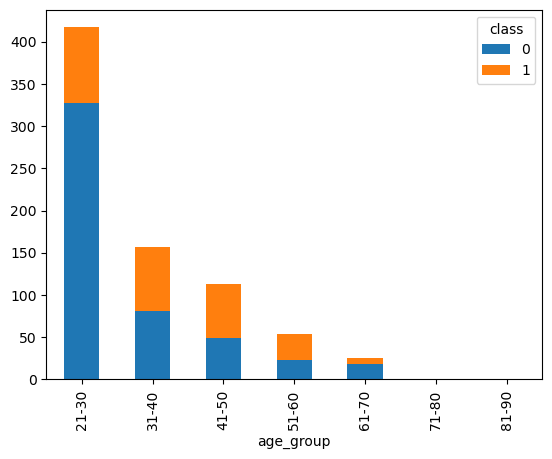

class,0,1
age_group,,
21-30,327,90
31-40,81,76
41-50,49,64
51-60,23,31
61-70,18,7
71-80,1,0
81-90,1,0


In [6]:
#나이 그룹별 당뇨병 발생 여부 확인
age_class = data.groupby(['age_group', 'class']).size().unstack()
age_class
#size() : 각 그룹내의 데이터수 세는 메소드
#unstack() : 데이터를 피벗하여 나이 그룹별 당뇨병 발생 여부 확인 할 수 있는 형태로 변환

#막대그래프로 표시
age_class.plot(kind='bar', stacked = True)
plt.show()
age_class

class     0     1
age              
21     58.0   5.0
22     61.0  11.0
23     31.0   7.0
24     38.0   8.0
25     34.0  14.0
26     25.0   8.0
27     24.0   8.0
28     25.0  10.0
29     16.0  13.0
30     15.0   6.0
31     11.0  13.0
32      7.0   9.0
33      7.0  10.0
34     10.0   4.0
35      5.0   5.0
36      6.0  10.0
37     13.0   6.0
38      6.0  10.0
39      9.0   3.0
40      7.0   6.0
41      9.0  13.0
42     11.0   7.0
43      2.0  11.0
44      3.0   5.0
45      7.0   8.0
46      6.0   7.0
47      2.0   4.0
48      4.0   1.0
49      2.0   3.0
50      3.0   5.0
51      3.0   5.0
52      1.0   7.0
53      1.0   4.0
54      2.0   4.0
55      3.0   1.0
56      1.0   2.0
57      4.0   1.0
58      4.0   3.0
59      1.0   2.0
60      3.0   2.0
61      1.0   1.0
62      2.0   2.0
63      4.0   NaN
64      1.0   NaN
65      3.0   NaN
66      2.0   2.0
67      2.0   1.0
68      1.0   NaN
69      2.0   NaN
70      NaN   1.0
72      1.0   NaN
81      1.0   NaN


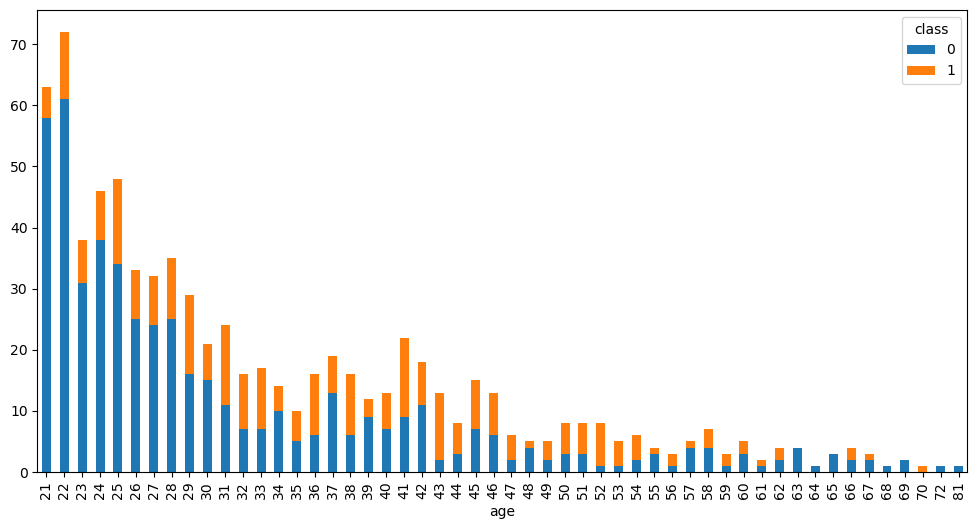

In [7]:
age_class2 = data.groupby(['age', 'class']).size().unstack()
print(age_class2)

age_class2.plot(kind='bar', stacked = True, figsize = (12, 6))
plt.show()

In [8]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import tensorflow as tf

In [9]:
#넘파이 라이브러리를 이용해 csv 파일 불러오기
data_set = np.loadtxt('pima-indians-diabetes.csv', delimiter = ',')
data_set

#사람의 속성, 당뇨병 여부 저장
X_train = data_set[:, 0:8]
y_train = data_set[:, 8]
print(X_train, X_train.shape)
print(y_train, y_train.shape)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]] (768, 8)
[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1

In [10]:
#딥러닝 모델 설정
model = Sequential()
model.add(Dense(12, input_dim = 8, activation = "relu")) #입력층, 첫번째 은닉층
model.add(Dense(8, activation = "relu")) #두번째 은닉층
model.add(Dense(1, activation = "linear")) #출력
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
#모델 컴파일
model.compile(loss = 'mean_squared_error', optimizer = "adam", metrics=['accuracy'])

In [12]:
#딥러닝 실행
model.fit(X_train, y_train, epochs = 100, batch_size = 10)

Epoch 1/100


77/77 [==============================] - 2s 3ms/step - loss: 396.5309 - accuracy: 0.5951
Epoch 2/100
77/77 [==============================] - 0s 2ms/step - loss: 24.9510 - accuracy: 0.4896
Epoch 3/100
77/77 [==============================] - 0s 2ms/step - loss: 19.1123 - accuracy: 0.5013
Epoch 4/100
77/77 [==============================] - 0s 2ms/step - loss: 15.0969 - accuracy: 0.5065
Epoch 5/100
77/77 [==============================] - 0s 2ms/step - loss: 11.5047 - accuracy: 0.5026
Epoch 6/100
77/77 [==============================] - 0s 3ms/step - loss: 8.6840 - accuracy: 0.5013
Epoch 7/100
77/77 [==============================] - 0s 3ms/step - loss: 7.0039 - accuracy: 0.4805
Epoch 8/100
77/77 [==============================] - 0s 2ms/step - loss: 5.8011 - accuracy: 0.4896
Epoch 9/100
77/77 [==============================] - 0s 2ms/step - loss: 5.1305 - accuracy: 0.4844
Epoch 10/100
77/77 [==============================] - 0s 2ms/step - loss: 4.4556 - accuracy: 0.5013
E

77/77 [==============================] - 0s 2ms/step - loss: 0.2651 - accuracy: 0.6654
Epoch 79/100
77/77 [==============================] - 0s 2ms/step - loss: 0.2585 - accuracy: 0.6966
Epoch 80/100
77/77 [==============================] - 0s 2ms/step - loss: 0.2688 - accuracy: 0.6810
Epoch 81/100
77/77 [==============================] - 0s 2ms/step - loss: 0.3168 - accuracy: 0.6784
Epoch 82/100
77/77 [==============================] - 0s 2ms/step - loss: 0.3164 - accuracy: 0.6562
Epoch 83/100
77/77 [==============================] - 0s 2ms/step - loss: 0.2271 - accuracy: 0.7122
Epoch 84/100
77/77 [==============================] - 0s 2ms/step - loss: 0.2324 - accuracy: 0.6940
Epoch 85/100
77/77 [==============================] - 0s 2ms/step - loss: 0.2381 - accuracy: 0.6927
Epoch 86/100
77/77 [==============================] - 0s 2ms/step - loss: 0.2646 - accuracy: 0.6758
Epoch 87/100
77/77 [==============================] - 0s 2ms/step - loss: 0.2517 - accuracy: 0.6914
Epoch 88/100


In [13]:
#손실값 리스트
loss_history = []

#딥러닝 실행
history = model.fit(X_train, y_train, epochs = 100, batch_size = 10, verbose = 1)

loss_history = history.history['loss']
print(loss_history)

Epoch 1/100
77/77 [==============================] - 0s 3ms/step - loss: 0.2423 - accuracy: 0.6914
Epoch 2/100
77/77 [==============================] - 0s 3ms/step - loss: 0.1997 - accuracy: 0.7305
Epoch 3/100
77/77 [==============================] - 0s 2ms/step - loss: 0.2273 - accuracy: 0.7018
Epoch 4/100
77/77 [==============================] - 0s 3ms/step - loss: 0.2601 - accuracy: 0.7044
Epoch 5/100
77/77 [==============================] - 0s 2ms/step - loss: 0.2444 - accuracy: 0.7018
Epoch 6/100
77/77 [==============================] - 0s 2ms/step - loss: 0.2263 - accuracy: 0.7122
Epoch 7/100
77/77 [==============================] - 0s 2ms/step - loss: 0.2306 - accuracy: 0.7161
Epoch 8/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1964 - accuracy: 0.7227
Epoch 9/100
77/77 [==============================] - 0s 3ms/step - loss: 0.2421 - accuracy: 0.7070
Epoch 10/100
77/77 [==============================] - 0s 3ms/step - loss: 0.2277 - accuracy: 0.7057
Epoch 11/

77/77 [==============================] - 0s 2ms/step - loss: 0.1953 - accuracy: 0.7409
Epoch 84/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1755 - accuracy: 0.7344
Epoch 85/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1799 - accuracy: 0.7500
Epoch 86/100
77/77 [==============================] - 0s 2ms/step - loss: 0.2003 - accuracy: 0.7201
Epoch 87/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1913 - accuracy: 0.7357
Epoch 88/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1825 - accuracy: 0.7526
Epoch 89/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1823 - accuracy: 0.7383
Epoch 90/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1650 - accuracy: 0.7565
Epoch 91/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1910 - accuracy: 0.7227
Epoch 92/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1735 - accuracy: 0.7487
Epoch 93/100


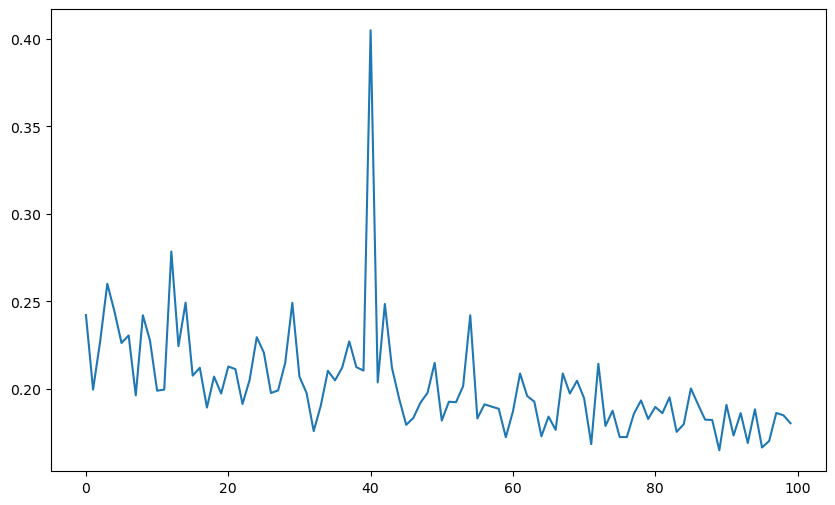

In [14]:
#손실 그래프 출력
plt.figure(figsize = (10, 6))
plt.plot(loss_history)
plt.show()

In [15]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

In [16]:
#csv 파일을 넘파이로 불러오기
data_set = np.loadtxt('pima-indians-diabetes.csv', delimiter = ',')

#속성과 당뇨병 여부를 저장
x = data_set[:, 0:8]
y = data_set[:, 8]

#데이터를 훈련 데이터와 테스트 데이터로 분할
split_index = int(len(data_set) * 0.8)

X_train = x[:split_index]
X_test = x[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(614, 8) (154, 8)
(614,) (154,)


In [17]:
#딥러닝 모델 설정
model = Sequential()

model.add(Dense(12, input_dim=8, activation = "relu")) #입력층, 첫번째 은닉층
model.add(Dense(8, activation = "relu")) #두번째 은닉층
model.add(Dense(1, activation = "sigmoid")) #출력층

In [18]:
#모델 컴파일
model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ['accuracy'])

In [19]:
#딥러닝 실행
model.fit(X_train, y_train, epochs = 100, batch_size = 10)

Epoch 1/100
62/62 [==============================] - 1s 3ms/step - loss: 0.4877 - accuracy: 0.4479
Epoch 2/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4611 - accuracy: 0.4560
Epoch 3/100
62/62 [==============================] - 0s 2ms/step - loss: 0.2824 - accuracy: 0.6287
Epoch 4/100
62/62 [==============================] - 0s 2ms/step - loss: 0.2479 - accuracy: 0.6352
Epoch 5/100
62/62 [==============================] - 0s 2ms/step - loss: 0.2321 - accuracy: 0.6547
Epoch 6/100
62/62 [==============================] - 0s 2ms/step - loss: 0.2261 - accuracy: 0.6596
Epoch 7/100
62/62 [==============================] - 0s 2ms/step - loss: 0.2312 - accuracy: 0.6580
Epoch 8/100
62/62 [==============================] - 0s 2ms/step - loss: 0.2230 - accuracy: 0.6417
Epoch 9/100
62/62 [==============================] - 0s 2ms/step - loss: 0.2187 - accuracy: 0.6710
Epoch 10/100
62/62 [==============================] - 0s 3ms/step - loss: 0.2122 - accuracy: 0.6775
Epoch 11/

62/62 [==============================] - 0s 2ms/step - loss: 0.1805 - accuracy: 0.7362
Epoch 84/100
62/62 [==============================] - 0s 3ms/step - loss: 0.1838 - accuracy: 0.7199
Epoch 85/100
62/62 [==============================] - 0s 3ms/step - loss: 0.1804 - accuracy: 0.7231
Epoch 86/100
62/62 [==============================] - 0s 2ms/step - loss: 0.1813 - accuracy: 0.7427
Epoch 87/100
62/62 [==============================] - 0s 3ms/step - loss: 0.1838 - accuracy: 0.7280
Epoch 88/100
62/62 [==============================] - 0s 3ms/step - loss: 0.1787 - accuracy: 0.7345
Epoch 89/100
62/62 [==============================] - 0s 3ms/step - loss: 0.1801 - accuracy: 0.7362
Epoch 90/100
62/62 [==============================] - 0s 2ms/step - loss: 0.1788 - accuracy: 0.7313
Epoch 91/100
62/62 [==============================] - 0s 3ms/step - loss: 0.1799 - accuracy: 0.7313
Epoch 92/100
62/62 [==============================] - 0s 2ms/step - loss: 0.1771 - accuracy: 0.7345
Epoch 93/100


In [20]:
#모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"테스트 손실 : {loss}, 테스트 정확도 : {accuracy}")

5/5 [==============================] - 0s 4ms/step - loss: 0.1871 - accuracy: 0.7078
테스트 손실 : 0.18712371587753296, 테스트 정확도 : 0.7077922224998474


In [21]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [22]:
data_set = np.loadtxt('pima-indians-diabetes.csv', delimiter = ",")

#속성, 당뇨병 여부 저장
X = data_set[:, 0:8]
y = data_set[:, 8]

#데이터 스케일링(표준화)
scaler = StandardScaler()
x = scaler.fit_transform(x)
print(x)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [23]:
#훈련 데이터와 테스트데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 48)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(614, 8) (154, 8)
(614,) (154,)


In [24]:
#딥러닝 모델 설정
model = Sequential()
model.add(Dense(12, input_dim= 8, activation = "relu")) #입력층, 첫번째 은닉층
model.add(Dense(8, activation="relu")) #두번째 은닉층
model.add(Dense(1, activation="sigmoid")) #출력층(이진분류)


In [25]:
#모델 컴파일
model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

In [26]:
#딥러닝 실행
model.fit(X_train, y_train, epochs = 100, batch_size = 10, verbose = 1)


Epoch 1/100
62/62 [==============================] - 1s 3ms/step - loss: 0.6458 - accuracy: 0.6580
Epoch 2/100
62/62 [==============================] - 0s 2ms/step - loss: 0.5946 - accuracy: 0.6661
Epoch 3/100
62/62 [==============================] - 0s 2ms/step - loss: 0.5558 - accuracy: 0.6906
Epoch 4/100
62/62 [==============================] - 0s 2ms/step - loss: 0.5238 - accuracy: 0.7459
Epoch 5/100
62/62 [==============================] - 0s 2ms/step - loss: 0.5006 - accuracy: 0.7524
Epoch 6/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4889 - accuracy: 0.7704
Epoch 7/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.7736
Epoch 8/100
62/62 [==============================] - 0s 3ms/step - loss: 0.4747 - accuracy: 0.7801
Epoch 9/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4707 - accuracy: 0.7769
Epoch 10/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4679 - accuracy: 0.7850
Epoch 11/

62/62 [==============================] - 0s 2ms/step - loss: 0.3845 - accuracy: 0.8225
Epoch 84/100
62/62 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8208
Epoch 85/100
62/62 [==============================] - 0s 2ms/step - loss: 0.3827 - accuracy: 0.8257
Epoch 86/100
62/62 [==============================] - 0s 3ms/step - loss: 0.3824 - accuracy: 0.8290
Epoch 87/100
62/62 [==============================] - 0s 2ms/step - loss: 0.3815 - accuracy: 0.8241
Epoch 88/100
62/62 [==============================] - 0s 2ms/step - loss: 0.3818 - accuracy: 0.8225
Epoch 89/100
62/62 [==============================] - 0s 2ms/step - loss: 0.3801 - accuracy: 0.8257
Epoch 90/100
62/62 [==============================] - 0s 2ms/step - loss: 0.3795 - accuracy: 0.8192
Epoch 91/100
62/62 [==============================] - 0s 2ms/step - loss: 0.3784 - accuracy: 0.8192
Epoch 92/100
62/62 [==============================] - 0s 3ms/step - loss: 0.3775 - accuracy: 0.8274
Epoch 93/100


In [27]:
#테스트 데이터로 모델 평가
pred = model.predict(X_test)
pred = (pred > 0.5) #임계값 설정(0.5) - 이진분류에서 사용

#정확도 계산
accuracy = accuracy_score(y_test, pred)
print(f"테스트 정확도 : {accuracy}")

5/5 [==============================] - 0s 3ms/step
테스트 정확도 : 0.7467532467532467
